In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [102]:
df=pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Data Processing Part 1

In [103]:
# drop salary columns since salary_in_usd can be used
# drop salary_current to use universal currecy i.e usd

df.drop(columns=['salary','salary_currency'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [104]:
#Ckeck for missing values
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

In [105]:
#check no of unique values on object datatype
df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
employee_residence    78
company_location      72
company_size           3
dtype: int64

Catagorise the job title

In [106]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [107]:
def seg_job_titles(job_title):
    data_scientist_titles=['Principal Data Scientist','Data Scientist','Applied Data Scientist','Data Science Manager',
                          'Head of Data', 'Data Manager','Data Specialist','Director of Data Science', 'Data Science Lead',
                           'Head of Data Science', 'NLP Engineer', 'Data Science Tech Lead', 'Data Scientist Lead', 
                           'Product Data Scientist',
                          'Staff Data Scientist','Deep Learning Researcher','Deep Learning Engineer',
                           'Computer Vision Software Engineer',
                           'Lead Data Scientist','Research Scientist','Applied Scientist','Computer Vision Engineer']
    machine_learing_titles=[ 'Machine Learning Engineer','Applied Machine Learning Engineer','Machine Learning Researcher',
                            'Machine Learning Scientist','MLOps Engineer','Applied Machine Learning Scientist',
                           'Machine Learning Infrastructure Engineer', 'Machine Learning Software Engineer',
                           'Machine Learning Research Engineer','Machine Learning Developer', 'Machine Learning Manager',
                            'Lead Machine Learning Engineer','ML Engineer',
                            'Principal Machine Learning Engineer','Head of Machine Learning' ]
    data_analyst_titles=['Data Analyst', 'Data Modeler','Analytics Engineer','Data Quality Analyst',
                         'Compliance Data Analyst','Data Analytics Manager',   'Business Data Analyst', 'Staff Data Analyst', 
                         'Lead Data Analyst', 'Financial Data Analyst','Data Science Consultant', 'Data Analytics Specialist',
                         'BI Data Analyst','Product Data Analyst','Data Analytics Lead', 'Data Lead',  'Data Analytics Engineer'
                         'Data Analytics Consultant', 'Marketing Data Analyst','Data Operations Analyst','Principal Data Analyst',
                         'Insight Analyst','Finance Data Analyst','BI Analyst' ]
    data_engineer_titles=['Data Strategist', 'Data Engineer','Data Architect','Big Data Architect', 'Data Infrastructure Engineer', 
                          'Software Data Engineer','Marketing Data Engineer', 'Cloud Data Engineer', 'Lead Data Engineer',
                          'Principal Data Engineer', 'Data Science Engineer', 'Principal Data Architect',
                          'Data Operations Engineer'
                         ]
    bi_analytics_titles=['BI Developer', 'Azure Data Engineer','Manager Data Management','Business Intelligence Engineer',
                         'AI Developer','ETL Engineer', 'Data DevOps Engineer','AI Scientist', ]
    other_titles=['Research Engineer', 
       'Power BI Developer',
        'ETL Developer', 'Cloud Data Architect','Big Data Engineer','3D Computer Vision Researcher','Data Management Specialist',
       'BI Data Engineer','Autonomous Vehicle Technician','Cloud Database Engineer', 'AI Programmer'
                 ]
    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learing_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'other'
    else:
        return 'unrecognised'

In [108]:
df['job_title']=df['job_title'].apply(seg_job_titles)

<AxesSubplot:>

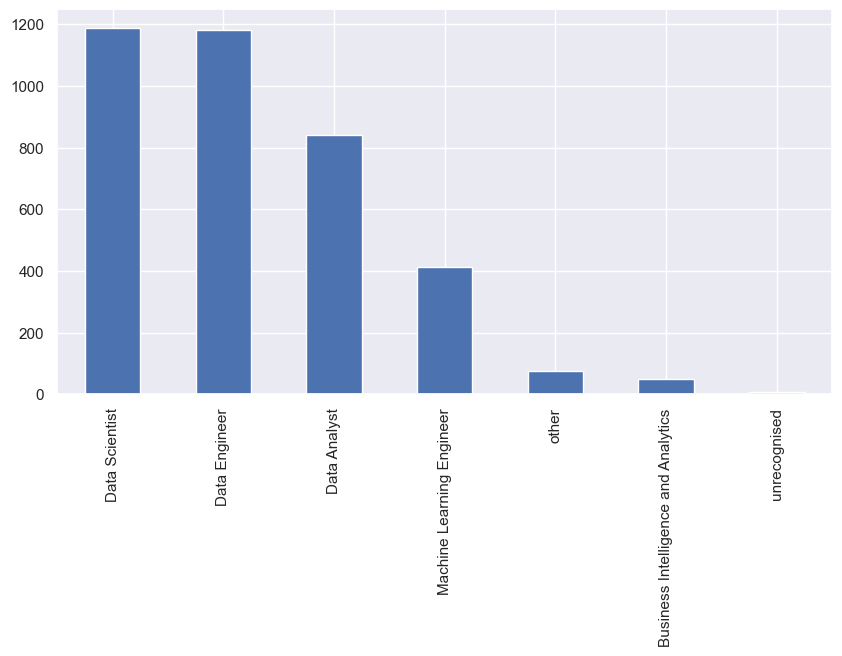

In [109]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().plot(kind='bar')

Categorize the Employee Residence 

In [110]:
df.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [111]:
#Define a function to categorize the unique values

def catagorize_region(country):
    if country in['DE','GB','PT','NL','CH','CF','FR','FI','UA','IE','AT','GR','PL','HU','RU','IT','DK','IL','CZ']:
             return 'Europe'
    elif country in['US','CA','MX']:
        return 'North America'
    elif country in['BR','AR','CL','BO','CR','DO','PR','HN','UY']:
        return 'South America'
    elif country in['NG','GH','KE','TN','DZ']:
        return 'Africa'
    elif country in['HK','IN','CN','JP','KR','BD','VN','PH','MY','ID','AE','PK','SK','UZ','BG','IQ','IR','CN','KW','TH','TR',
                    
                   'SI','AM','MA','BA']:
        return 'Asia'
    elif country in['AU','NZ']:
        return 'Oceania'
    else:
        return 'unknown'
    
    

In [112]:
# Apply this function to the employee_residence columns to update with new locations
df['employee_residence']=df['employee_residence'].apply(catagorize_region)

    
    

<AxesSubplot:>

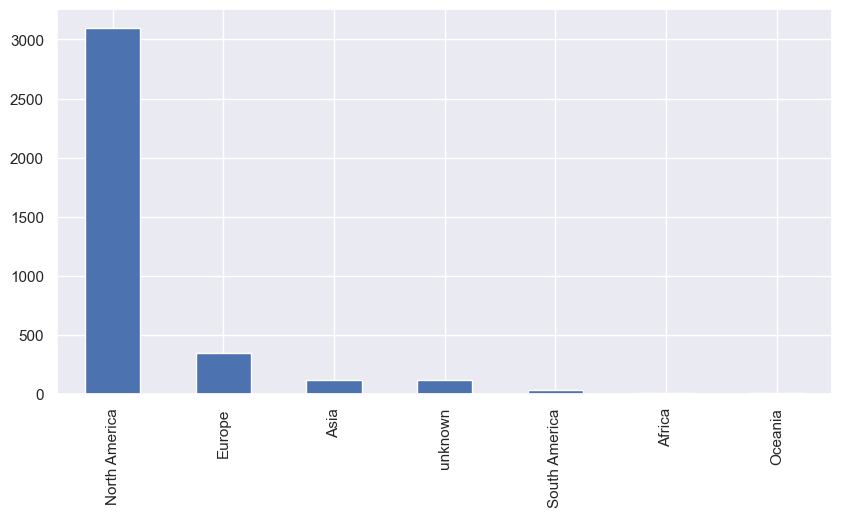

In [113]:
plt.figure(figsize=(10,5))
df['employee_residence'].value_counts().plot(kind='bar')

In [114]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [115]:

def catagorize_region(country):
    if country in['DE','GB','PT','NL','CH','CF','FR','FI','UA','IE','AT','GR','PL','HU','RU','IT','DK','IL','CZ']:
             return 'Europe'
    elif country in['US','CA','MX']:
        return 'North America'
    elif country in['BR','AR','CL','BO','CR','DO','PR','HN','UY']:
        return 'South America'
    elif country in['NG','GH','KE','TN','DZ']:
        return 'Africa'
    elif country in['HK','IN','CN','JP','KR','BD','VN','PH','MY','ID','AE','PK','SK','UZ','BG','IQ','IR','CN','KW','TH','TR',
                    
                   'SI','AM','MA','BA']:
        return 'Asia'
    elif country in['AU','NZ']:
        return 'Oceania'
    else:
        return 'unknown'

In [116]:
# Apply this function to the company_location columns to update with new locations
df['company_location']=df['company_location'].apply(catagorize_region)

    

<AxesSubplot:>

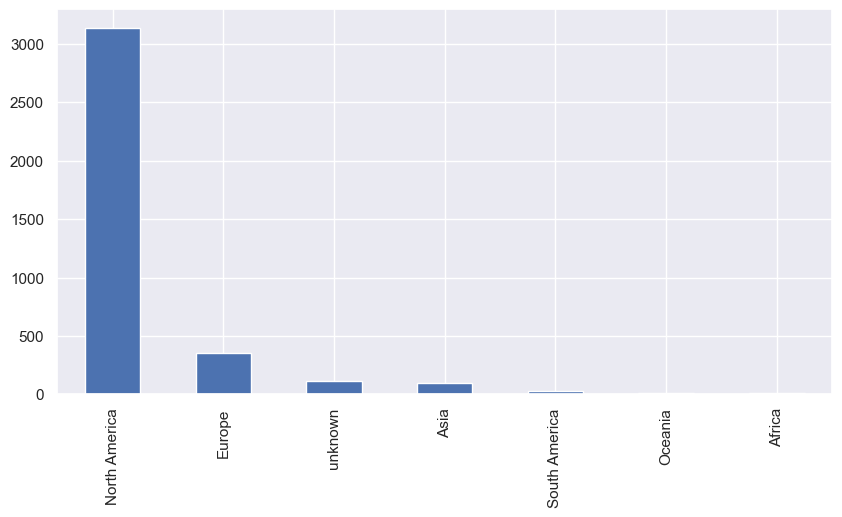

In [117]:
plt.figure(figsize=(10,5))
df['company_location'].value_counts().plot(kind='bar')

In [118]:
#Check no of unique values on object datatype
df.select_dtypes(include='object').nunique()

experience_level      4
employment_type       4
job_title             7
employee_residence    7
company_location      7
company_size          3
dtype: int64

EXPLORATARY DATA ANALYSIS

In [119]:
df.remote_ratio.unique()

array([100,   0,  50], dtype=int64)

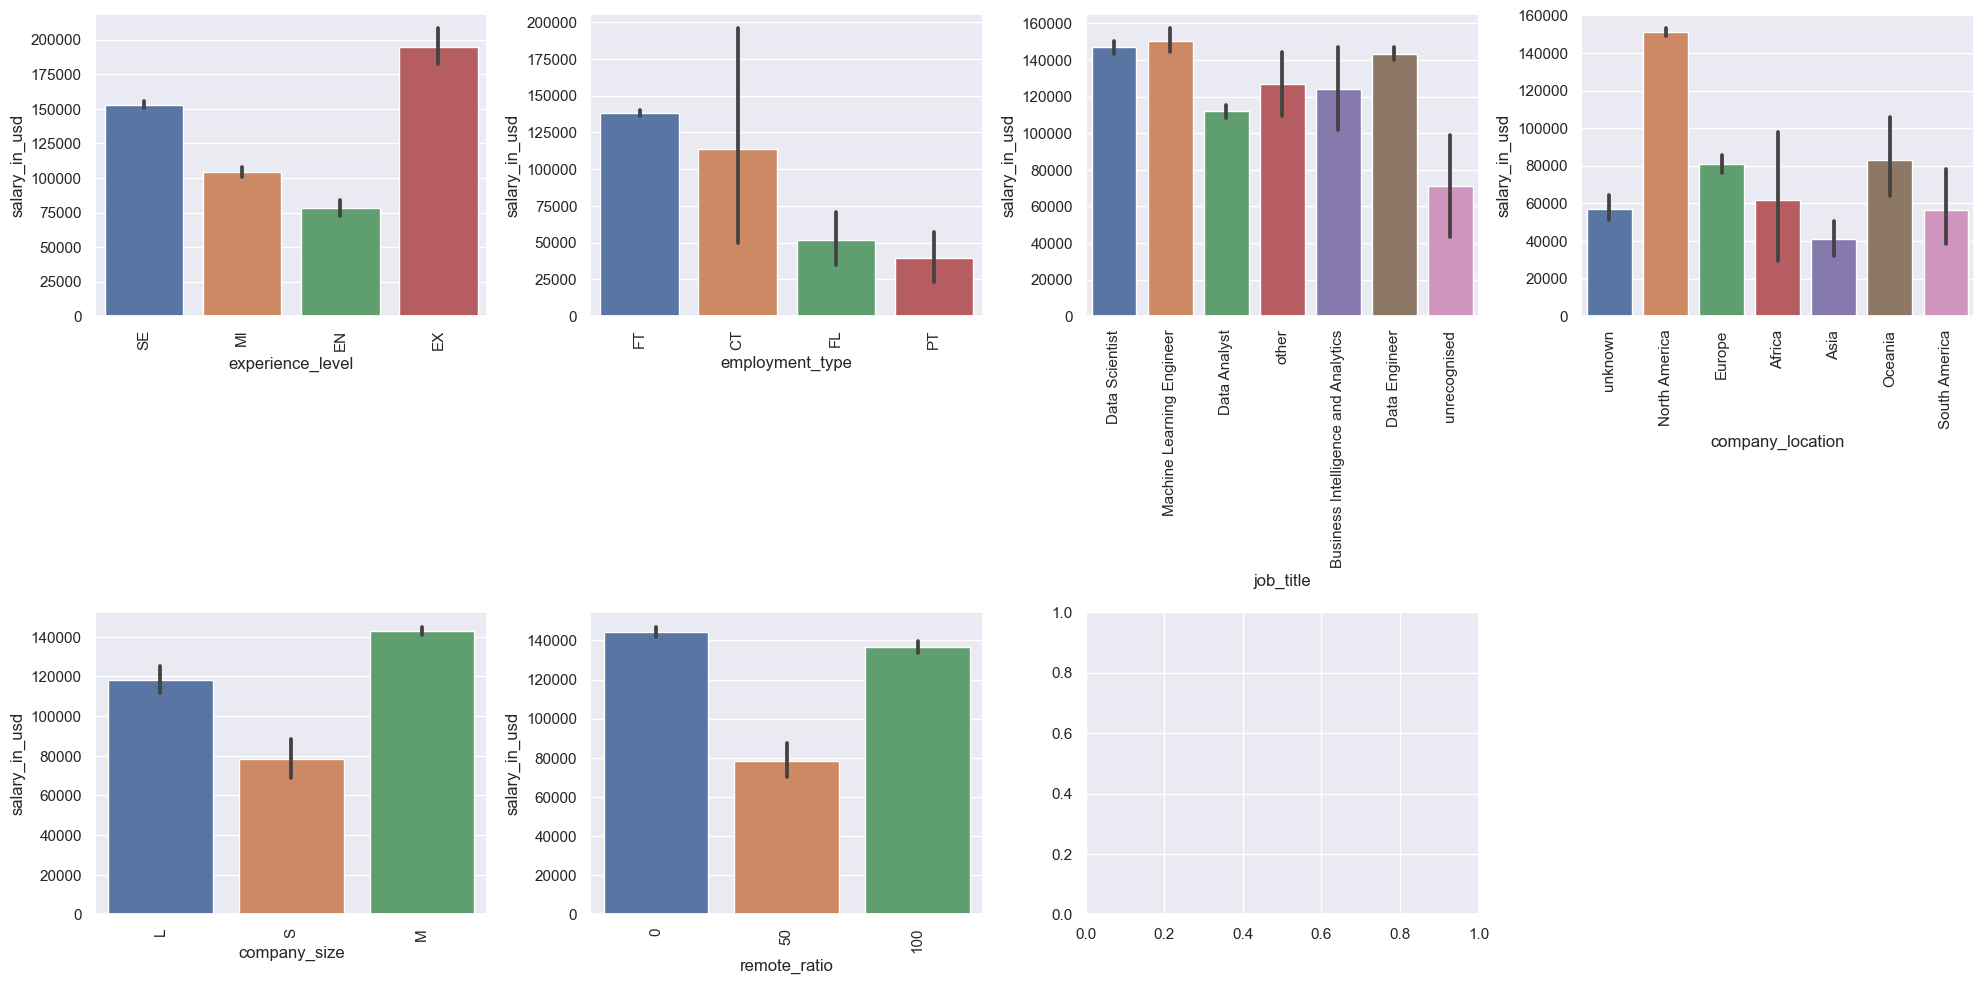

In [120]:
#list of catagorial variables to plot
cat_vars=['experience_level','employment_type','job_title','company_location','company_size','remote_ratio']
#create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs=axs.flatten()

#create barplot for each catagorial variable

for i, var in enumerate(cat_vars):
    sns.barplot(x=var,y='salary_in_usd',data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
#remove 8th subplot

fig.delaxes(axs[7])
#adjust spacing betweel subplots

fig.tight_layout()

#show plot
plt.show()



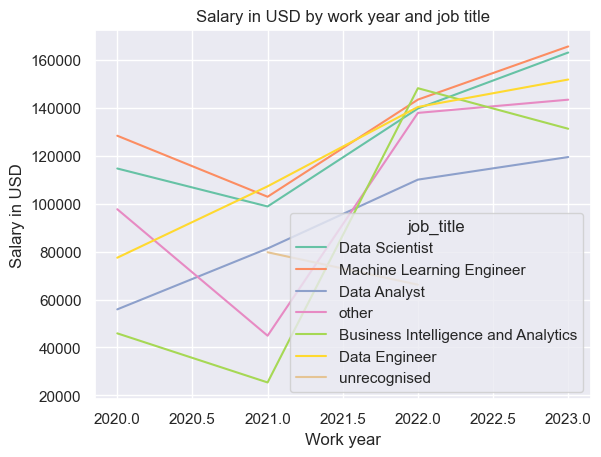

In [121]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='work_year',y='salary_in_usd',hue='job_title',data=df,ci=None)

plt.title('Salary in USD by work year and job title')
plt.xlabel('Work year')
plt.ylabel('Salary in USD')

plt.show()

DATA PROCESSING PART 2

LABEL ENCODING FOR OBJECT DATATYPE

In [122]:
# loop over each column in the DataFrame where dtype is 'object'

for col in df.select_dtypes(include=['object']).columns:
    #print the column name and unique values
    print(f"{col}: {df[col].unique()}")

experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Data Scientist' 'Machine Learning Engineer' 'Data Analyst' 'other'
 'Business Intelligence and Analytics' 'Data Engineer' 'unrecognised']
employee_residence: ['unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_location: ['unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_size: ['L' 'S' 'M']


In [123]:
from sklearn import preprocessing
#loop over each coulmn in DataFrame where dtype is object
for col in df.select_dtypes(include=['object']).columns:
    #Initialize the label encoder
    label_encoder=preprocessing.LabelEncoder()
    
    #Fit the encoder to the unique value in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the column using encoder
    df[col]=label_encoder.transform(df[col])
    
    #Print the column name and unique encoded values
    print(f"{col}:{df[col].unique()}")


experience_level:[3 2 0 1]
employment_type:[2 0 1 3]
job_title:[3 4 1 5 0 2 6]
employee_residence:[6 3 2 0 1 4 5]
company_location:[6 3 2 0 1 4 5]
company_size:[0 2 1]


In [124]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

ALL THE DATA IS CATAGORIAL SO THAT MEANS THERE ARE NO OUTLIERS

<AxesSubplot:>

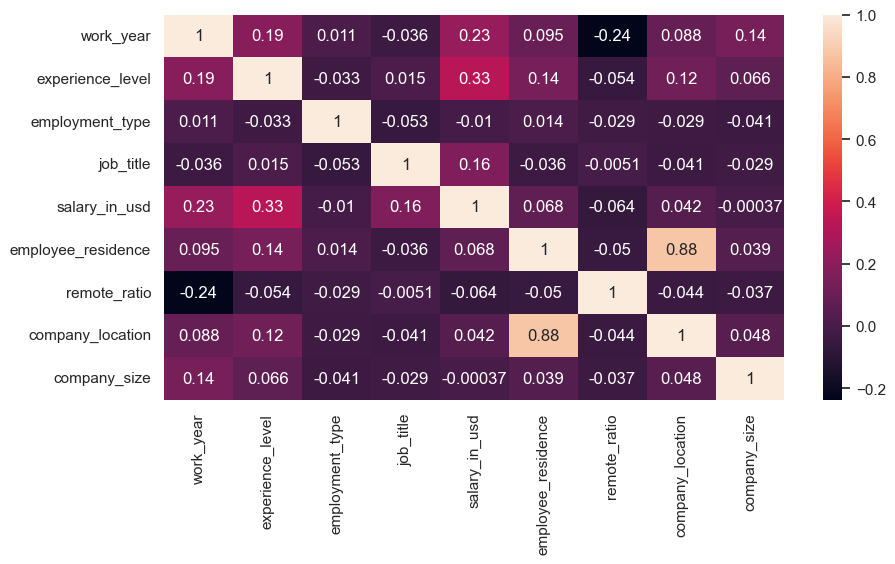

In [125]:
#CORELATION HEATMAP
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),fmt='.2g',annot=True)


TRAIN TEST SPLITS

In [126]:
X=df.drop('salary_in_usd', axis=1)
y=df['salary_in_usd']

In [127]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


DECISION TREE REGRESSOR

In [133]:
pip install -U scikit-learn

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# Create a Decision Tree Regressor Object

dtree=DecisionTreeRegressor()

#Define the hyperparamaters to tune and thier values

param_grid={
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['auto','sqrt','log2']
    
}

#Create a Grid Search CV object

grid_search=GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

#Fit the GridSearchCV object to the data
grid_search.fit(X_train,y_train)

#print the best hyperparameters
print(grid_search.best_params_)


C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\KIRAN\a

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8}


C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [145]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(random_state=0,max_depth=8,max_features='auto',min_samples_leaf=2,min_samples_split=8)
dtree.fit(X_train,y_train)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=0)

In [146]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=dtree.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

MAE is 39291.46248134226
MAPE is 0.35560405550569074
MSE is 2853754264.296422
R2 is 0.33113289854967665
RMSE is 53420.54159493726


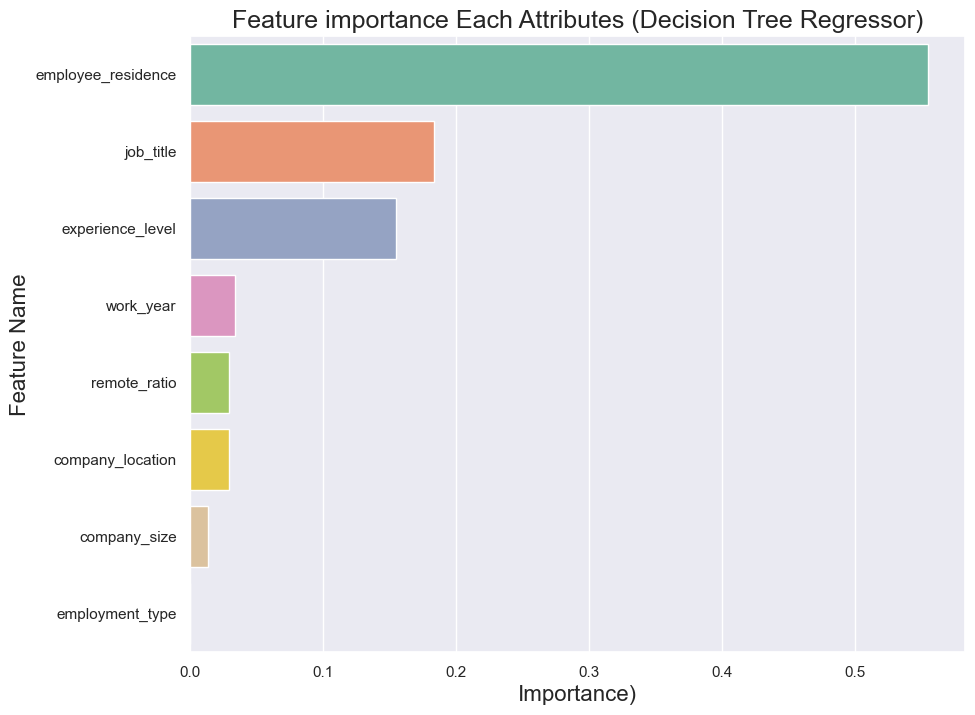

In [149]:
imp_df=pd.DataFrame({
    'Feature Name':X_train.columns,
    'Importance':dtree.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature importance Each Attributes (Decision Tree Regressor)',fontsize=18)
plt.xlabel('Importance)',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

In [151]:
pip install shap


     ------------------------------------ 435.6/435.6 kB 663.5 kB/s eta 0:00:00


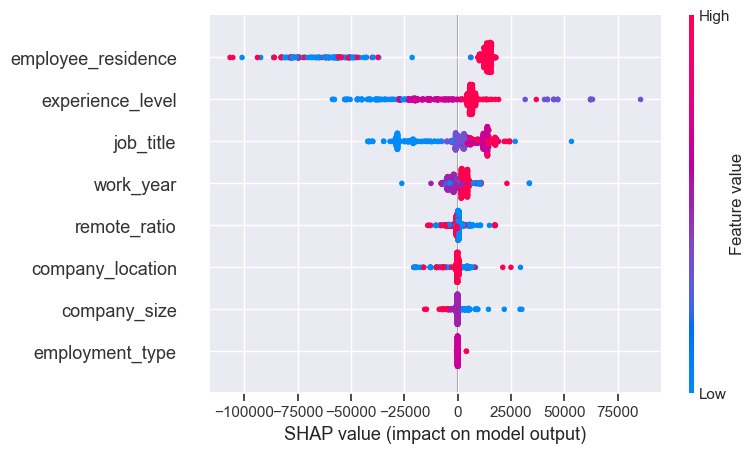

In [152]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)


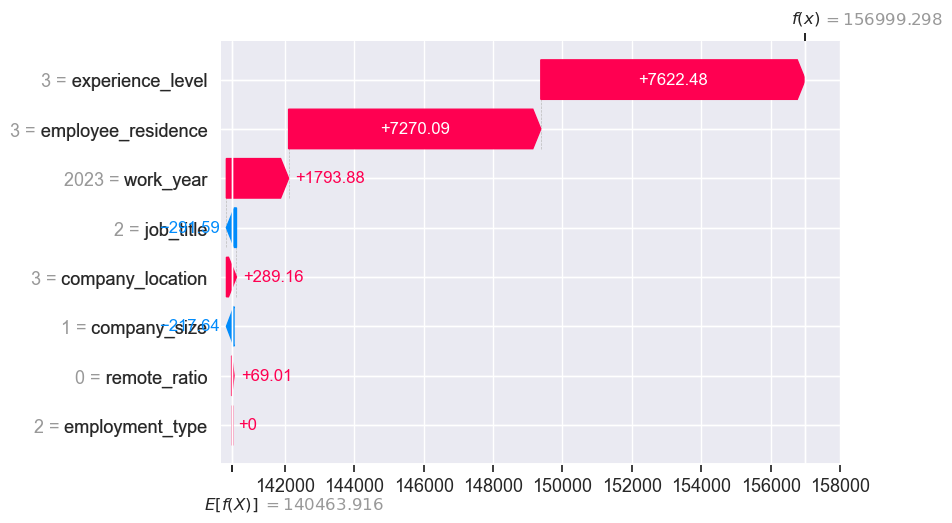

In [153]:
explainer=shap.Explainer(dtree,X_test)
shap_values=explainer(X_test)
shap.plots.waterfall(shap_values[0])

Random Forest Regressor

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Create a Random Forest Regressor object

rf=RandomForestRegressor()

#Define the hyperparameter grid
param_grid={
    'max_depth':[3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
    
}

#Create a Grid Search CV Object

grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')

#Fir the GridSearchCV object to the training data

grid_search.fit(X_train,y_train)

#Print the best hyperparameters
print('Best Hyperparameters',grid_search.best_params_)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max

Best Hyperparameters {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5}


In [160]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0,max_depth=7,min_samples_split=5,min_samples_leaf=4,max_features='auto')
rf.fit(X_train,y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


RandomForestRegressor(max_depth=7, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, random_state=0)

In [161]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=rf.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

MAE is 38701.948344562785
MAPE is 0.3695190872096532
MSE is 2736934941.641224
R2 is 0.35851318237976904
RMSE is 52315.723655906964


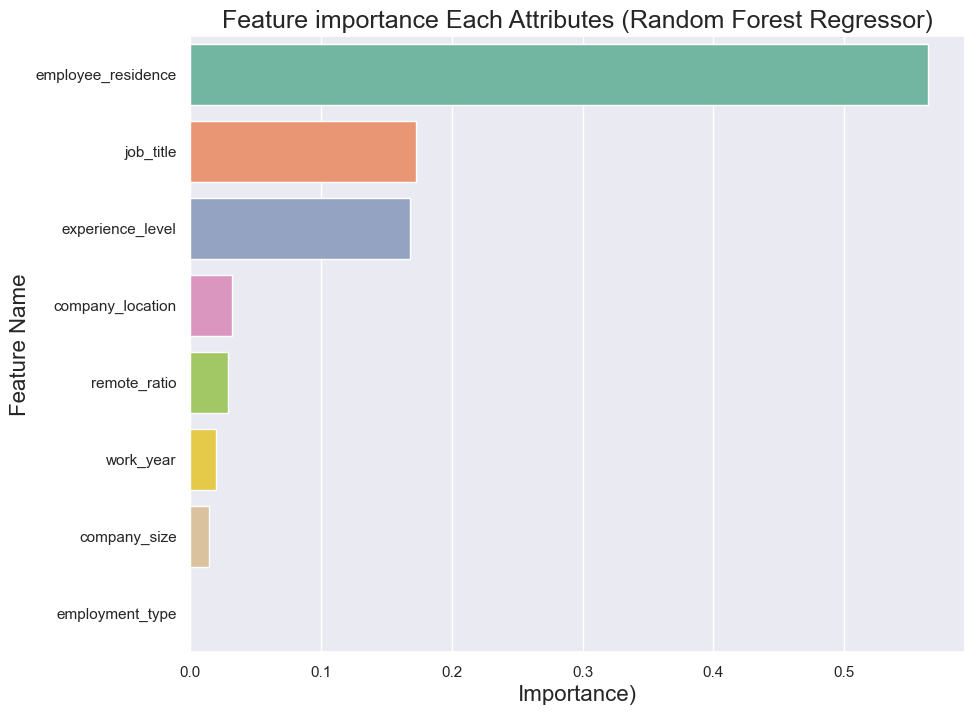

In [162]:
imp_df=pd.DataFrame({
    'Feature Name':X_train.columns,
    'Importance':rf.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature importance Each Attributes (Random Forest Regressor)',fontsize=18)
plt.xlabel('Importance)',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

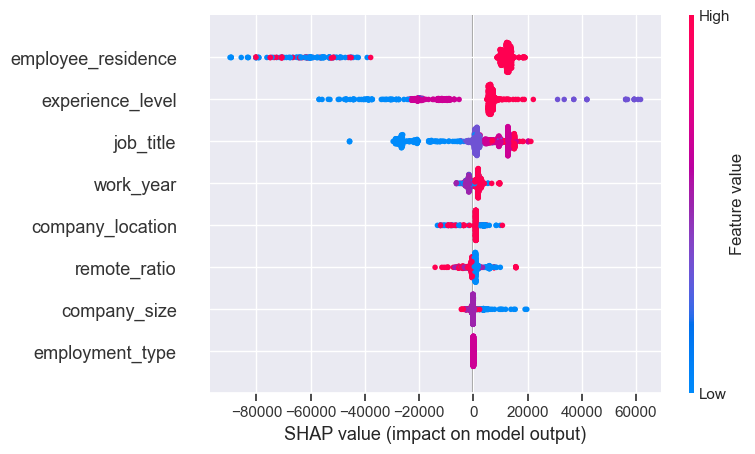

In [163]:
import shap
explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)


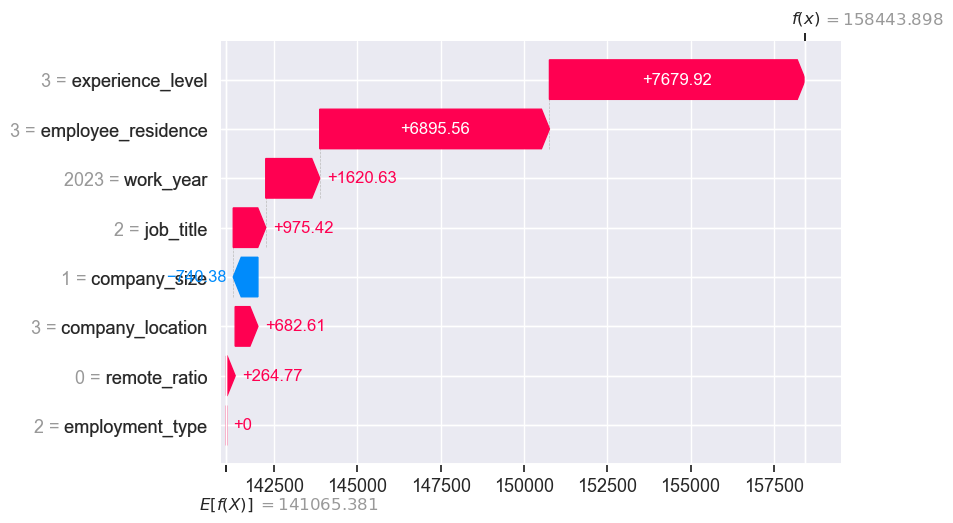

In [164]:
explainer=shap.Explainer(rf,X_test)
shap_values=explainer(X_test)
shap.plots.waterfall(shap_values[0])